In [50]:
from neural_priors.utils.data import Subject

In [52]:
sub = Subject('alina')

<Axes: xlabel='run,None'>

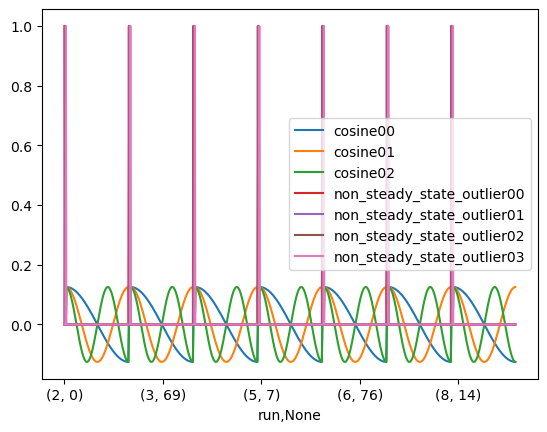

In [53]:
sub.get_confounds().plot()

In [57]:
confounds = [d.values for run, d in sub.get_confounds().groupby('run')]

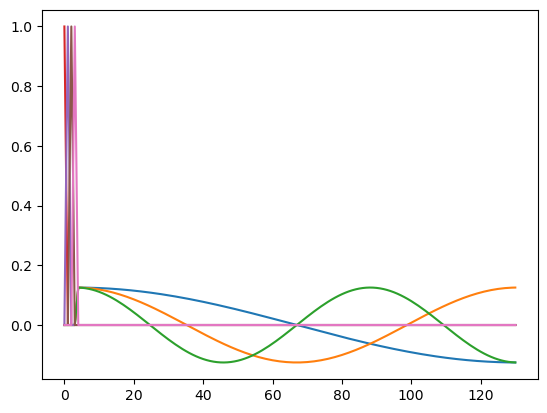

In [60]:

import matplotlib.pyplot as plt
plt.plot(confounds[1])

In [31]:
onsets = sub.get_onsets()

In [32]:
from nilearn.glm.first_level import make_first_level_design_matrix

In [33]:
onsets

onset     n trial_type  response
run trial_nr                                       
1   1           7.523678  19.0   stimulus       NaN
    1          13.112035   NaN   response      21.0
    2          17.232602  18.0   stimulus       NaN
    2          21.836813   NaN   response      17.0
    3          25.957343  13.0   stimulus       NaN
...                  ...   ...        ...       ...
8   238       274.653975   NaN   response      28.0
    239       278.774393  13.0   stimulus       NaN
    239       285.363794   NaN   response      11.0
    240       289.500839  17.0   stimulus       NaN
    240       295.106164   NaN   response       NaN

[480 rows x 4 columns]

In [34]:
onsets['trial_type'] = onsets.apply(lambda row: f'stimulus_{row["n"]}' if row['trial_type'] == 'stimulus' else f'response_{row.response}', axis=1)
onsets['duration'] = 0.0

In [36]:
import numpy as np

x = np.load('/data/ds-neuralpriors/derivatives/glm_stim1.denoise/sub-alina/ses-1/func/TYPED_FITHRF_GLMDENOISE_RR.npy', allow_pickle=True).item()

['/data/ds-neuralpriors/derivatives/fmriprep/sub-alina/ses-1/func/sub-alina_ses-1_task-task_run-2_space-T1w_desc-preproc_bold.nii.gz',
 '/data/ds-neuralpriors/derivatives/fmriprep/sub-alina/ses-1/func/sub-alina_ses-1_task-task_run-3_space-T1w_desc-preproc_bold.nii.gz',
 '/data/ds-neuralpriors/derivatives/fmriprep/sub-alina/ses-1/func/sub-alina_ses-1_task-task_run-4_space-T1w_desc-preproc_bold.nii.gz',
 '/data/ds-neuralpriors/derivatives/fmriprep/sub-alina/ses-1/func/sub-alina_ses-1_task-task_run-5_space-T1w_desc-preproc_bold.nii.gz',
 '/data/ds-neuralpriors/derivatives/fmriprep/sub-alina/ses-1/func/sub-alina_ses-1_task-task_run-6_space-T1w_desc-preproc_bold.nii.gz',
 '/data/ds-neuralpriors/derivatives/fmriprep/sub-alina/ses-1/func/sub-alina_ses-1_task-task_run-7_space-T1w_desc-preproc_bold.nii.gz',
 '/data/ds-neuralpriors/derivatives/fmriprep/sub-alina/ses-1/func/sub-alina_ses-1_task-task_run-8_space-T1w_desc-preproc_bold.nii.gz']

In [49]:
from nilearn import image as img


img.new_img_like(img.load_img(sub.get_preprocessed_bold()[0]), x['R2']).to_filename('/data/ds-neuralpriors/derivatives/glm_stim1.denoise/sub-alina/ses-1/func/R2.nii.gz')

In [21]:
type(x)

numpy.ndarray

In [33]:
x['FRACvalue', :]

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_10458/2069357704.py", line 1, in <module>
    x['FRACvalue', :]
IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/ultratb.py", line 1118, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/ultrat

In [18]:
# Convert the numpy array to a dictionary
x_dict = dict(x.flatten())

# Access the keys of the dictionary
keys = x_dict.keys()

# Print the keys
print(keys)
x

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_10458/384953769.py", line 2, in <module>
    x_dict = dict(x.flatten())
ValueError: dictionary update sequence element #0 has length 15; 2 is required

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/ultratb.py", line 1118, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/ultratb.py", line 1012, in structured_traceback
 

In [36]:
import numpy as np
import pandas as
runs = sub.get_runs(session=1)

tr = 2.3
n = 131
frametimes = np.linspace(tr/2., (n - .5)*tr, n)
onsets['onset'] = ((onsets['onset']+tr/2.) // 2.3) * 2.3

dm = [make_first_level_design_matrix(frametimes, onsets.loc[run], hrf_model='fir', oversampling=100.,
                                        drift_order=0,
                                        drift_model=None).drop('constant', axis=1) for run in runs]

dm = pd.concat(dm, keys=runs, names=['run']).fillna(0)
dm.columns = [c.replace('_delay_0', '') for c in dm.columns]
dm /= dm.max()
print(dm)


/Users/gdehol/mambaforge/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/Users/gdehol/mambaforge/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `n` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/Users/gdehol/mambaforge/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:113: FutureWarning: The provided callable <function sum at 0x111b863b0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  COLUMN_DEFINING_EVENT_IDENTITY, sort=False).agg(STRATEGY).reset_index()
/Users/gdehol/mambaforge/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: 

            response_100  response_120  response_130  response_140  \
run                                                                  
1   1.15             0.0           0.0           0.0           0.0   
    3.45             0.0           0.0           0.0           0.0   
    5.75             0.0           0.0           0.0           0.0   
    8.05             0.0           0.0           0.0           0.0   
    10.35            0.0           0.0           0.0           0.0   
...                  ...           ...           ...           ...   
8   290.95           0.0           0.0           0.0           0.0   
    293.25           0.0           0.0           0.0           0.0   
    295.55           0.0           0.0           0.0           0.0   
    297.85           0.0           0.0           0.0           0.0   
    300.15           0.0           0.0           0.0           0.0   

            response_150  response_170  response_180  response_190  \
run                

/Users/gdehol/mambaforge/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `response` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/Users/gdehol/mambaforge/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `n` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/Users/gdehol/mambaforge/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:113: FutureWarning: The provided callable <function sum at 0x111b863b0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  COLUMN_DEFINING_EVENT_IDENTITY, sort=False).agg(STRATEGY).reset_index()
/Users/gdehol/mambaforge/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: 

In [38]:
dm.sum()

response_100    25.0
response_120    11.0
response_130    20.0
response_140    21.0
response_150    15.0
response_170    15.0
response_180    15.0
response_190    11.0
response_200    11.0
response_210     9.0
response_220     7.0
response_nan    11.0
stimulus_100     8.0
stimulus_110     9.0
stimulus_120    11.0
stimulus_130     8.0
stimulus_140    12.0
stimulus_150    15.0
stimulus_160     5.0
stimulus_170    12.0
stimulus_180    16.0
stimulus_190    19.0
stimulus_200     7.0
stimulus_210    12.0
stimulus_220    17.0
stimulus_230    14.0
stimulus_240    11.0
stimulus_250     9.0
response_110    18.0
response_160    15.0
response_230     5.0
response_250     8.0
response_270     4.0
response_280     6.0
response_290     5.0
response_360     1.0
stimulus_280     5.0
stimulus_290     3.0
stimulus_310     6.0
stimulus_330     2.0
stimulus_350     2.0
stimulus_360     6.0
stimulus_370     5.0
stimulus_380     6.0
stimulus_390     3.0
response_240     3.0
response_320     2.0
stimulus_260 

<Axes: ylabel='run-None'>

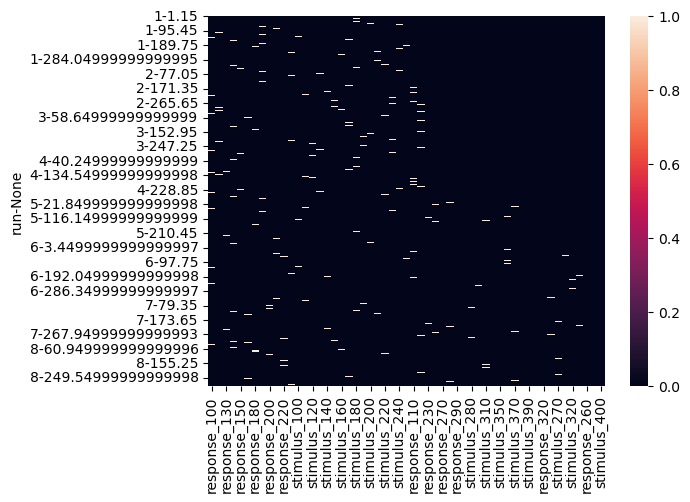

In [37]:
import seaborn as sns

sns.heatmap(dm)

In [170]:
d = subject.get_behavioral_data(tasks=['estimation_task'], raw=True, add_info=False).droplevel([0, 1])

onset0 = d.groupby('run').apply(lambda x: x.xs('trigger_2', 0, 'event_type')['onset'])

d['onset'] -= onset0.loc[d.index.get_level_values('run')].values

d['trial_nr'] = (d.index.get_level_values('run') - 1) * 30 + d['trial_nr']

d = d.set_index('trial_nr', append=True).droplevel(1)

In [172]:
import pandas as pd


stimulus = d.xs('stimulus', 0, 'event_type')[['onset', 'n']]
stimulus['trial_type'] = 'stimulus'

response = d.xs('response', 0, 'event_type')[['onset']].join(d.xs('feedback', 0, 'event_type')['response'])
response['trial_type'] = 'response'
response = response.groupby('run', group_keys=False).apply(lambda x: x.iloc[:30])

assert(len(response) == len(stimulus))

onsets = pd.concat((stimulus, response)).groupby('run', group_keys=False).apply(lambda x: x.sort_values('onset'))



In [173]:
onsets

onset     n trial_type response
run trial_nr                                      
1   1           7.523678  19.0   stimulus      NaN
    1          13.112035   NaN   response     21.0
    2          17.232602  18.0   stimulus      NaN
    2          21.836813   NaN   response     17.0
    3          25.957343  13.0   stimulus      NaN
...                  ...   ...        ...      ...
8   238       274.653975   NaN   response       28
    239       278.774393  13.0   stimulus      NaN
    239       285.363794   NaN   response       11
    240       289.500839  17.0   stimulus      NaN
    240       295.106164   NaN   response      NaN

[480 rows x 4 columns]

In [29]:
onset0

run  subject  task             run   
1    alina    estimation_task  1    6    50.645050
2    alina    estimation_task  2    6    28.715300
3    alina    estimation_task  3    6    24.547741
4    alina    estimation_task  4    6    24.618922
5    alina    estimation_task  5    6    47.452004
6    alina    estimation_task  6    6    23.915804
7    alina    estimation_task  7    6    22.950296
8    alina    estimation_task  8    6    22.654828
Name: onset, dtype: float64

In [27]:
d.xs('trigger_2', 0, 'event_type')

trial_nr      onset  phase response  nr_frames  \
subject task            run                                                     
alina   estimation_task 1   6         0  50.645050      1      NaN      138.0   
                        2   6         0  28.715300      1      NaN      138.0   
                        3   6         0  24.547741      1      NaN      138.0   
                        4   6         0  24.618922      1      NaN      138.0   
                        5   6         0  47.452004      1      NaN      138.0   
                        6   6         0  23.915804      1      NaN      137.0   
                        7   6         0  22.950296      1      NaN      137.0   
                        8   6         0  22.654828      1      NaN      138.0   

                                n  jitter  start_marker_position  \
subject task            run                                        
alina   estimation_task 1   6 NaN     NaN                    NaN   
                        2   6 NaN     NaN                    NaN   
                        3   6 NaN     NaN                    NaN   
                        4   6 NaN     NaN                    NaN   
                        5   6 NaN     NaN                    NaN   
                        6   6 NaN     NaN                    NaN   
                        7   6 NaN     NaN                    NaN   
                        8   6 NaN     NaN                    NaN   

                               response_time  onset_abs  duration   range  
subject task            run                                                
alina   estimation_task 1   6            NaN  56.062148  2.302151  narrow  
                        2   6            NaN  33.584201  2.302103  narrow  
                        3   6            NaN  67.546496  2.302238  narrow  
                        4   6            NaN  30.113362  2.302144  narrow  
                        5   6            NaN  51.333498  2.302109    wide  
                        6   6            NaN  27.764100  2.285526    wide  
                        7   6            NaN  26.998178  2.285508    wide  
                        8   6            NaN  27.129098  2.302206    wide

In [26]:
onset0

subject  task             run   
alina    estimation_task  1    6    50.645050
                          2    6    28.715300
                          3    6    24.547741
                          4    6    24.618922
                          5    6    47.452004
                          6    6    23.915804
                          7    6    22.950296
                          8    6    22.654828
Name: onset, dtype: float64

In [3]:
subject_id = 'alina'

subject = Subject(subject_id)

bold = subject.get_preprocessed_bold(session=1)

In [4]:
bold

['/data/ds-neuralpriors/derivatives/fmriprep/sub-alina/ses-1/func/sub-alina_ses-1_task-task_run-2_space-T1w_desc-preproc_bold.nii.gz',
 '/data/ds-neuralpriors/derivatives/fmriprep/sub-alina/ses-1/func/sub-alina_ses-1_task-task_run-3_space-T1w_desc-preproc_bold.nii.gz',
 '/data/ds-neuralpriors/derivatives/fmriprep/sub-alina/ses-1/func/sub-alina_ses-1_task-task_run-4_space-T1w_desc-preproc_bold.nii.gz',
 '/data/ds-neuralpriors/derivatives/fmriprep/sub-alina/ses-1/func/sub-alina_ses-1_task-task_run-5_space-T1w_desc-preproc_bold.nii.gz',
 '/data/ds-neuralpriors/derivatives/fmriprep/sub-alina/ses-1/func/sub-alina_ses-1_task-task_run-6_space-T1w_desc-preproc_bold.nii.gz',
 '/data/ds-neuralpriors/derivatives/fmriprep/sub-alina/ses-1/func/sub-alina_ses-1_task-task_run-7_space-T1w_desc-preproc_bold.nii.gz',
 '/data/ds-neuralpriors/derivatives/fmriprep/sub-alina/ses-1/func/sub-alina_ses-1_task-task_run-8_space-T1w_desc-preproc_bold.nii.gz']